In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset.csv')

In [11]:
# Drop missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)



# Display the first few rows to verify changes
df.head()



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Encode categorical variables
label_encoders = {}
for column in ['artists', 'album_name', 'track_name', 'track_genre']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select relevant features and target variable
features = ['artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 
            'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
            'time_signature', 'track_genre']
target = 'popularity'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Display feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance_df


RMSE: 13.955119321554653


/Users/sanjitamaram/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Feature,Importance
1,album_name,0.138908
17,track_genre,0.130075
2,track_name,0.073809
0,artists,0.070461
11,acousticness,0.066070
3,duration_ms,0.063957
5,danceability,0.060960
8,loudness,0.055345
14,valence,0.053491
10,speechiness,0.053395


/Users/sanjitamaram/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 22.315769032483487


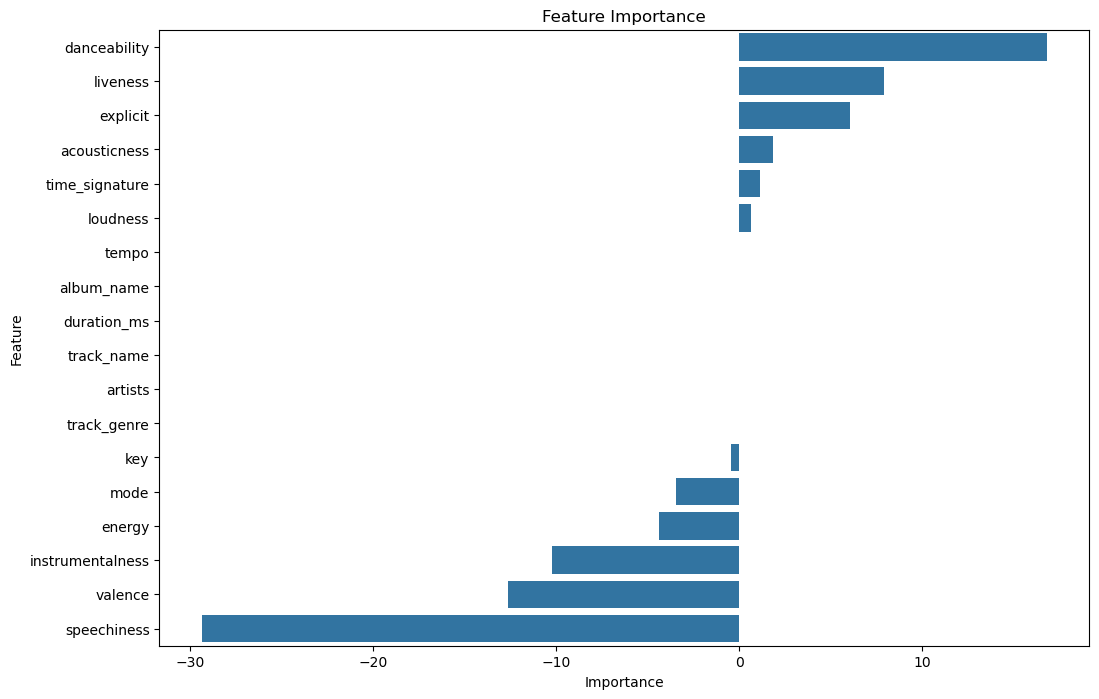

,Feature,Importance
5,danceability,16.809536
13,liveness,7.890703
4,explicit,6.066280
11,acousticness,1.816968
16,time_signature,1.158770
8,loudness,0.639480
15,tempo,0.007742
1,album_name,0.000088
3,duration_ms,0.000004
2,track_name,-0.000021


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Use a smaller subset of the data for quick execution
df_sample = df.sample(n=1000, random_state=42)

# Select relevant features and target variable
X_sample = df_sample[features]
y_sample = df_sample[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Display feature importances
importances = model.coef_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

feature_importance_df


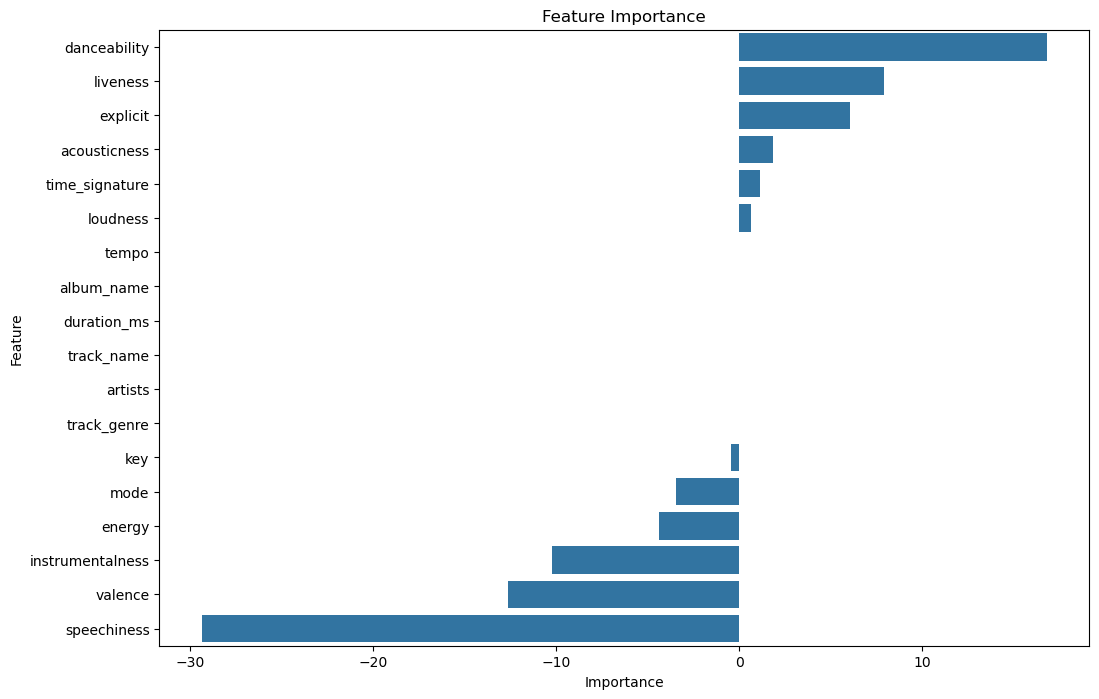

,Feature,Importance
5,danceability,16.809536
13,liveness,7.890703
4,explicit,6.066280
11,acousticness,1.816968
16,time_signature,1.158770
8,loudness,0.639480
15,tempo,0.007742
1,album_name,0.000088
3,duration_ms,0.000004
2,track_name,-0.000021


In [16]:
# Display feature coefficients
importances = model.coef_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

feature_importance_df
